# Exploring PubLayNet

(Assuming you've copied PubLayNet dataset to an S3 bucket and downloaded just the `val` folder + `val.json` folder to your SageMaker notebook)


In [2]:
import json
import os
import sys

import boto3
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import sagemaker

In [3]:
with open("data/publaynet/val.json", "r") as f:
    val = json.loads(f.read())

In [4]:
val.keys()

dict_keys(['images', 'annotations', 'categories'])

In [5]:
len(val["images"])

11245

In [6]:
len(val["annotations"])

120761

In [7]:
val["annotations"][0]

{'segmentation': [[50.58,
   490.86,
   290.69,
   490.86,
   290.69,
   502.23,
   290.7,
   502.23,
   290.7,
   515.67,
   290.69,
   515.67,
   290.69,
   527.04,
   290.67,
   527.04,
   290.67,
   536.33,
   290.69,
   536.33,
   290.69,
   547.7,
   290.72,
   547.7,
   290.72,
   559.07,
   290.73,
   559.07,
   290.73,
   572.51,
   290.7,
   572.51,
   290.7,
   583.87,
   290.69,
   583.87,
   290.69,
   595.24,
   290.68,
   595.24,
   290.68,
   606.61,
   290.67,
   606.61,
   290.67,
   615.9,
   290.69,
   615.9,
   290.69,
   627.27,
   290.7,
   627.27,
   290.7,
   638.64,
   290.73,
   638.64,
   290.73,
   652.08,
   290.66,
   652.08,
   290.66,
   661.37,
   290.67,
   661.37,
   290.67,
   672.74,
   290.67,
   672.74,
   290.67,
   684.11,
   290.67,
   684.11,
   290.67,
   695.48,
   290.69,
   695.48,
   290.69,
   706.85,
   290.7,
   706.85,
   290.7,
   718.22,
   290.7,
   718.22,
   290.7,
   731.66,
   288.16,
   731.66,
   288.16,
   743.03,
   50.58,

In [8]:
val["categories"]

[{'supercategory': '', 'id': 1, 'name': 'text'},
 {'supercategory': '', 'id': 2, 'name': 'title'},
 {'supercategory': '', 'id': 3, 'name': 'list'},
 {'supercategory': '', 'id': 4, 'name': 'table'},
 {'supercategory': '', 'id': 5, 'name': 'figure'}]

In [9]:
val["images"][0]

{'file_name': 'PMC4055390_00006.jpg',
 'width': 601,
 'id': 341427,
 'height': 792}

Got 6 annotations


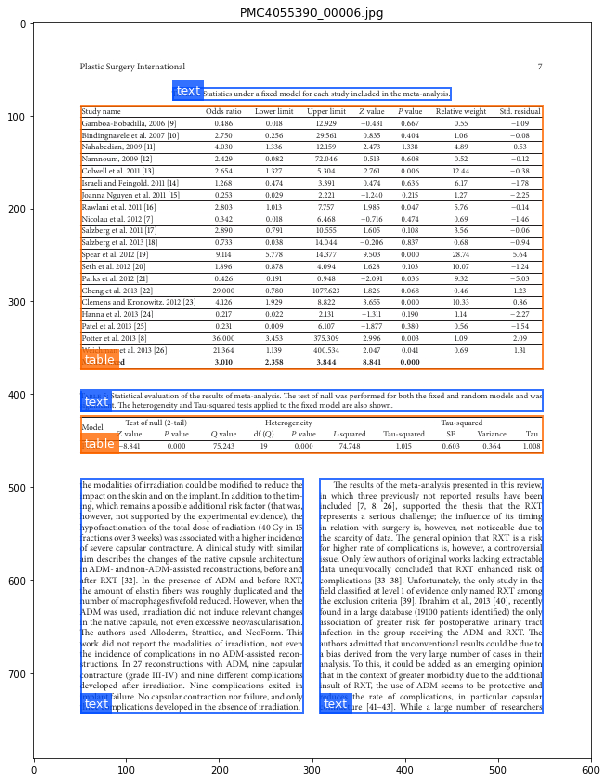

Got 27 annotations


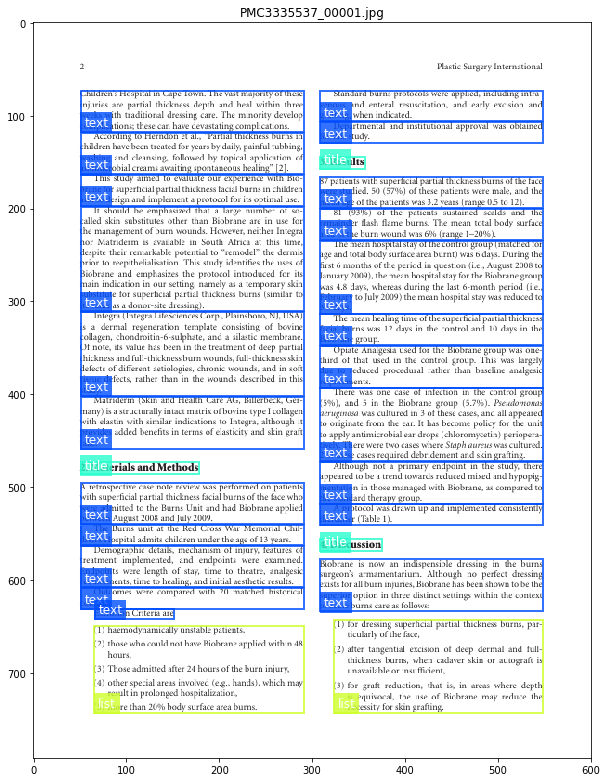

In [10]:
imspec = val["images"][0]

def display(imspec, cmap=plt.cm.jet):
    filename = "data/publaynet/val/" + imspec["file_name"]
    annotations = [ann for ann in val["annotations"] if ann["image_id"] == imspec["id"]]
    print(f"Got {len(annotations)} annotations")
    img = Image.open(filename)
    fig, ax0 = plt.subplots(figsize=(10, 15))
    ax0.imshow(np.array(img))
    for ann in annotations:
        cat_name = next(cat for cat in val["categories"] if cat["id"] == ann["category_id"])["name"]
        color = cmap(ann["category_id"] / len(val["categories"]))
        bbox = ann["bbox"]
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=color, linewidth=2, alpha=0.8)
        ax0.add_patch(rect)
        ax0.text(
            bbox[0] + 4,
            (bbox[1] + bbox[3]) - 6,
            cat_name,
            bbox=dict(facecolor=color, alpha=0.8, linewidth=0),
            color="white",
            fontsize=12,
        )
    ax0.set_title(imspec["file_name"])
    plt.show()

for ix in range(0, 2):
    display(val["images"][ix])